**Nama : Muhammad Raihan Ekaputra Idrisatria**

**Asal : Universitas Brawijaya**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import os
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
base_dir="/content/drive/MyDrive/File Program MBKM/Submisi_Tiga_Muhammad_Raihan_Ekaputra/Submisi_Tiga_3_Klasifikasi_Gambar_TF_Lite/dataset"

In [3]:
os.listdir(base_dir)

['without_mask', 'incorrect_mask', 'with_mask']

In [4]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [5]:
train_gen=train_datagen.flow_from_directory(base_dir,
                                            subset='training',
                                            class_mode='categorical',
                                            target_size=(150,150),
                                            shuffle=True)

validation_gen=train_datagen.flow_from_directory(base_dir,
                                            subset='validation',
                                            class_mode='categorical',
                                            target_size=(150,150),
                                            shuffle=True,)

Found 1664 images belonging to 3 classes.
Found 415 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(240, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(240,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.09) and (logs.get('val_loss')<0.09):
      self.model.stop_training = True

history=model.fit(
        train_gen,
        steps_per_epoch=15,  
        epochs=100, 
        validation_data=validation_gen, 
        validation_steps=5,
        verbose='auto',
        callbacks=myCallback())  

Epoch 1/100
15/15 [==============================] - 30s 2s/step - loss: 1.1057 - accuracy: 0.3604 - val_loss: 1.1037 - val_accuracy: 0.3313
Epoch 2/100
15/15 [==============================] - 27s 2s/step - loss: 1.0977 - accuracy: 0.3354 - val_loss: 1.0998 - val_accuracy: 0.3187
Epoch 3/100
15/15 [==============================] - 27s 2s/step - loss: 1.1033 - accuracy: 0.3708 - val_loss: 1.0915 - val_accuracy: 0.4938
Epoch 4/100
15/15 [==============================] - 27s 2s/step - loss: 1.0875 - accuracy: 0.3729 - val_loss: 0.9848 - val_accuracy: 0.6875
Epoch 5/100
15/15 [==============================] - 27s 2s/step - loss: 1.3867 - accuracy: 0.4396 - val_loss: 0.9290 - val_accuracy: 0.5625
Epoch 6/100
15/15 [==============================] - 27s 2s/step - loss: 0.8102 - accuracy: 0.6479 - val_loss: 0.5011 - val_accuracy: 0.7812
Epoch 7/100
15/15 [==============================] - 27s 2s/step - loss: 0.6372 - accuracy: 0.7729 - val_loss: 0.4231 - val_accuracy: 0.8562
Epoch 8/100
1

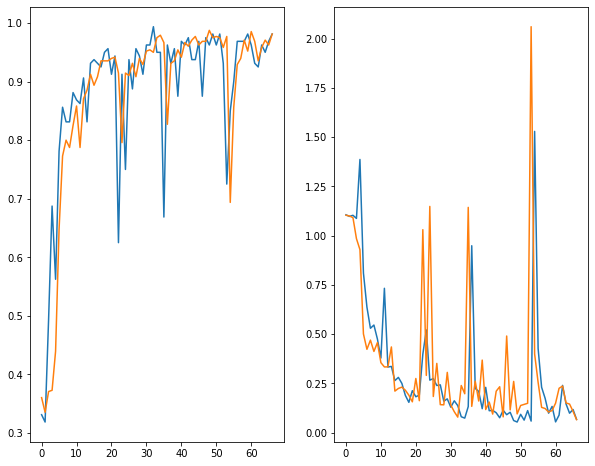

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [11]:
!pip install tensorflowjs

In [12]:
path_model='/content/Submisi_Tiga_Klasifikasi_Masker_TF_Lite/'
tf.saved_model.save(model,path_model)

INFO:tensorflow:Assets written to: /content/Submisi_Tiga_Klasifikasi_Masker_TF_Lite/assets


In [13]:
!tensorflowjs_converter \
  --input_format=tf_saved_model \
  /content/Submisi_Tiga_Klasifikasi_Masker_TF_Lite \
  /content/modeltfjs

2021-09-15 11:11:38.263515: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-15 11:11:38.263570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3c3b1c474818): /proc/driver/nvidia/version does not exist
2021-09-15 11:11:38.263975: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-15 11:11:39.060091: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-09-15 11:11:39.060341: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-09-15 11:11:39.066798: I tensorflow/cor